In [159]:
import os
import pandas as pd
import mapreduce as mr
import csv

In [9]:
!ls ./trips

ltrips_short_exp123_wkdy_final_noXYcoord.txt
ltrips_short_exp13_sat_final_noXYcoord.txt
ltrips_short_exp13_sun_final_noXYcoord.txt


# Trip data
[relevant page](http://web.mta.info/mta/planning/data-nyc-travel.html)

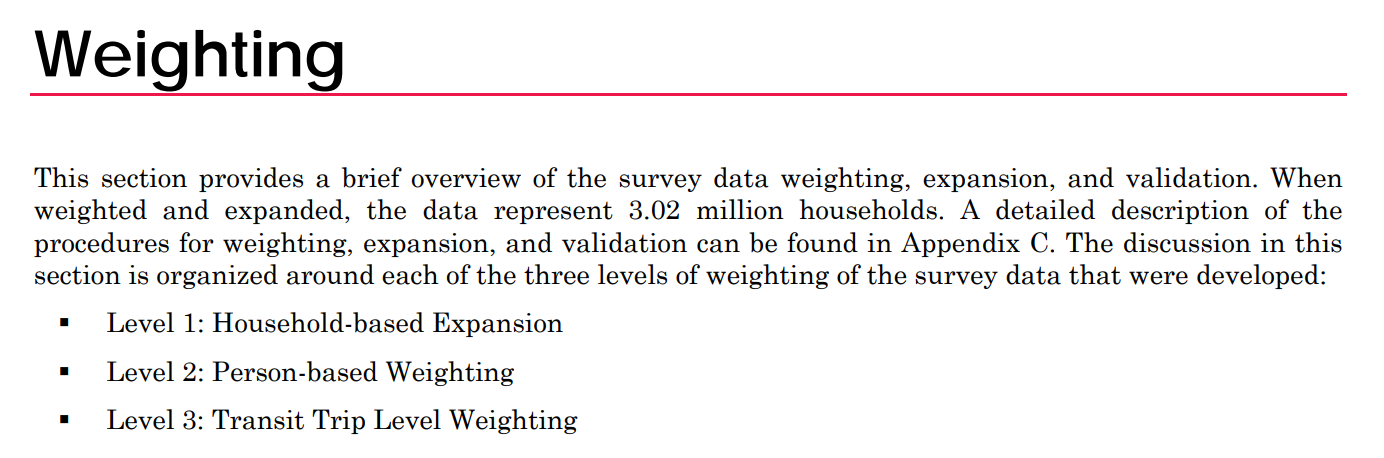

Since this data is based on survey, MTA applied and validated weight. The description can be found in the report (pg. 46) <br>
But not fully understood! I just tried this. <br>
[Report](http://web.mta.info/mta/planning/data/NYC-Travel-Survey/NYCTravelSurvey.pdf)

In [263]:
week = pd.read_csv('./trips/ltrips_short_exp123_wkdy_final_noXYcoord.txt', dtype=str)

In [257]:
print('The number of total respondents: {}'.format(len(week)))

The number of total respondents: 49167


In [259]:
[(i,j) for i,j in zip(week.columns, range(len(week.columns)))]

[('sampn', 0),
 ('perno', 1),
 ('tripno', 2),
 ('TRIP_ID', 3),
 ('otype', 4),
 ('dtype', 5),
 ('tpur', 6),
 ('dtime', 7),
 ('atime', 8),
 ('trip_sdate', 9),
 ('trip_edate', 10),
 ('O_COUNTY_STR', 11),
 ('D_COUNTY_STR', 12),
 ('Ptype', 13),
 ('daywk', 14),
 ('trans', 15),
 ('travy', 16),
 ('ntrav', 17),
 ('o_ntrav', 18),
 ('trtot', 19),
 ('ussob', 20),
 ('new_fare', 21),
 ('metro', 22),
 ('cash', 23),
 ('tmet', 24),
 ('o_tmet', 25),
 ('tumet', 26),
 ('o_tumet', 27),
 ('ppmet', 28),
 ('fare', 29),
 ('esub1', 30),
 ('esub2', 31),
 ('esub3', 32),
 ('esub4', 33),
 ('esub5', 34),
 ('esub6', 35),
 ('esub7', 36),
 ('esub8', 37),
 ('trip_count', 38),
 ('rectype', 39),
 ('s_dat', 40),
 ('s_dur', 41),
 ('ctfip', 42),
 ('incen', 43),
 ('stype', 44),
 ('lang', 45),
 ('hhnum', 46),
 ('hhveh', 47),
 ('ltele', 48),
 ('ctele', 49),
 ('cctel', 50),
 ('hinet', 51),
 ('hmrac', 52),
 ('o_hmrac', 53),
 ('ccmin', 54),
 ('ccinc', 55),
 ('cclin', 56),
 ('hcity', 57),
 ('hstat', 58),
 ('hzip', 59),
 ('hcnty', 6

In [350]:
sum(week['EXP32_FINAL_WKD'].astype(float).dropna())

14308914.969999703

In [258]:
week[['O_TRACT','D_TRACT']][week['O_TRACT'] == week['D_TRACT']]

,O_TRACT,D_TRACT
13,36005017300.00,36005017300.00
34,36005017300.00,36005017300.00
38,36005005902.00,36005005902.00
47,36005005901.00,36005005901.00
48,36005005901.00,36005005901.00
49,36005005901.00,36005005901.00
54,36005005901.00,36005005901.00
62,36005006500.00,36005006500.00
63,36005006500.00,36005006500.00
64,36005006500.00,36005006500.00


3205 trips has same origin and destination which is 6% of the total respondents.

In [264]:
week_dif_OD = week[week['O_TRACT'] != week['D_TRACT']]

In [265]:
len(week_dif_OD)

45962

In [167]:
# With OD same rows

reader = enumerate([(tract[:-3],1) for tract in week['O_TRACT'].astype(str)])
def mapper(_,o):
    yield(o)
def reducer(o,count):
    yield(o,sum(count))
o_tracts = list(mr.run(reader,mapper,reducer))

reader = enumerate([(tract[:-3],1) for tract in week['D_TRACT'].astype(str)])
def mapper(_,o):
    yield(o)
def reducer(o,count):
    yield(o,sum(count))
d_tracts = list(mr.run(reader,mapper,reducer))

In [271]:
# Without OD same rows

reader = enumerate([(tract[:-3],1) for tract in week_dif_OD['O_TRACT'].astype(str)])
def mapper(_,o):
    yield(o)
def reducer(o,count):
    yield(o,sum(count))
o_tracts = list(mr.run(reader,mapper,reducer))

reader = enumerate([(tract[:-3],1) for tract in week_dif_OD['D_TRACT'].astype(str)])
def mapper(_,o):
    yield(o)
def reducer(o,count):
    yield(o,sum(count))
d_tracts = list(mr.run(reader,mapper,reducer))

In [172]:
# with open('eggs.csv', 'w', newline='') as csvfile:
#     spamwriter = csv.writer(csvfile, delimiter=' ',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     for i in o_tracts:
#         spamwriter.writerow(i)

# with open('spam.csv', 'w', newline='') as csvfile:
#     spamwriter = csv.writer(csvfile, delimiter=' ',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     for i in d_tracts:
#         spamwriter.writerow(i)

In [272]:
trip_o = pd.DataFrame(o_tracts, columns=['tracts','trip_o'])
trip_d = pd.DataFrame(d_tracts, columns=['tracts','trip_d'])

In [273]:
display(trip_o.head(), trip_d.head())

,tracts,trip_o
0,11001005900,2
1,11001008600,1
2,19061000100,1
3,25019950100,1
4,25019950400,1


,tracts,trip_d
0,,1
1,11001008600,1
2,25019950400,1
3,25027759100,4
4,34001002400,5


# Census Tracts

## Census Tract Code Format
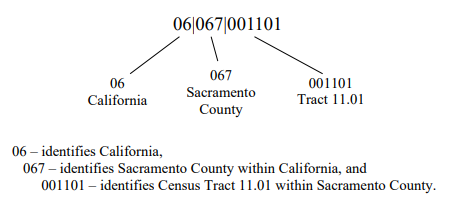
* census tract code
* state + county + tract
Counties in NYC <br>
[county code in NYC](https://www2.census.gov/geo/docs/reference/codes/files/st36_ny_cou.txt) <br>
State Code of NYC : 36 <br>
* Manhattan - New York County (061)
* Bronx - Bronx County (005)
* Brooklyn - Kings County (047)
* Queens - Queens County (081)
* Staten Island - Richmond County (085)

In [36]:
ct2000 = pd.read_csv('nyct2000wi.csv', dtype=str)

In [39]:
ct2000.head()

,BoroCode,BoroName,CTLabel,the_geom,CT2000,BoroCT2000,CDEligibil,NTACode,NTANAme,PUMA,Shape_Leng,Shape_Area
0,1,Manhattan,98,MULTIPOLYGON (((-73.96432543478758 40.75638153...,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20005976,1906016.374
1,1,Manhattan,100,MULTIPOLYGON (((-73.96802436915851 40.75957814...,010000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.16866575,1860938.35958
2,1,Manhattan,190,MULTIPOLYGON (((-73.94505127984516 40.80259859...,019000,1019000,E,MN11,Central Harlem South,3803,4231.8265884,1117371.65978
3,1,Manhattan,206,MULTIPOLYGON (((-73.93580780201182 40.80949763...,020600,1020600,E,MN03,Central Harlem North-Polo Grounds,3803,5176.87315098,1602693.82096
4,1,Manhattan,217.02,MULTIPOLYGON (((-73.9470345118215 40.815829904...,021702,1021702,E,MN03,Central Harlem North-Polo Grounds,3803,3338.290909,446993.881638


In [188]:
ct2000.BoroName.unique()

array(['Manhattan', 'Bronx', 'Queens', 'Brooklyn', 'Staten Island'],
      dtype=object)

In [234]:
ct2000['cdct'][ct2000['BoroName']=='Manhattan'] = '36061' + ct2000['CT2000']
ct2000['cdct'][ct2000['BoroName']=='Bronx'] = '36005' + ct2000['CT2000']
ct2000['cdct'][ct2000['BoroName']=='Brooklyn'] = '36047' + ct2000['CT2000']
ct2000['cdct'][ct2000['BoroName']=='Queens'] = '36081' + ct2000['CT2000']
ct2000['cdct'][ct2000['BoroName']=='Staten Island'] = '36085' + ct2000['CT2000']

In [235]:
ct2000[:2]

,BoroCode,BoroName,CTLabel,the_geom,CT2000,BoroCT2000,CDEligibil,NTACode,NTANAme,PUMA,Shape_Leng,Shape_Area,cdct
0,1,Manhattan,98,MULTIPOLYGON (((-73.96432543478758 40.75638153...,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20005976,1906016.374,36061009800
1,1,Manhattan,100,MULTIPOLYGON (((-73.96802436915851 40.75957814...,010000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.16866575,1860938.35958,36061010000


In [236]:
print(ct2000.cdct.dtype, trip_o.tracts.dtype, trip_d.tracts.dtype )
print(trip_o.trip_o.dtype, trip_d.trip_d.dtype)

object object object
int64 int64


In [274]:
mrg = pd.merge(ct2000, trip_o, how='inner', left_on='cdct', right_on='tracts')
mrg = pd.merge(mrg, trip_d, how='inner', left_on='cdct', right_on='tracts')

In [275]:
print(len(mrg))
display(mrg.head())

2120


,BoroCode,BoroName,CTLabel,the_geom,CT2000,BoroCT2000,CDEligibil,NTACode,NTANAme,PUMA,Shape_Leng,Shape_Area,cdct,tracts_x,trip_o,tracts_y,trip_d
0,1,Manhattan,98,MULTIPOLYGON (((-73.96432543478758 40.75638153...,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,5534.20005976,1906016.374,36061009800,36061009800,72,36061009800,74
1,1,Manhattan,100,MULTIPOLYGON (((-73.96802436915851 40.75957814...,010000,1010000,I,MN19,Turtle Bay-East Midtown,3808,5692.16866575,1860938.35958,36061010000,36061010000,145,36061010000,140
2,1,Manhattan,190,MULTIPOLYGON (((-73.94505127984516 40.80259859...,019000,1019000,E,MN11,Central Harlem South,3803,4231.8265884,1117371.65978,36061019000,36061019000,36,36061019000,33
3,1,Manhattan,206,MULTIPOLYGON (((-73.93580780201182 40.80949763...,020600,1020600,E,MN03,Central Harlem North-Polo Grounds,3803,5176.87315098,1602693.82096,36061020600,36061020600,9,36061020600,9
4,1,Manhattan,217.02,MULTIPOLYGON (((-73.9470345118215 40.815829904...,021702,1021702,E,MN03,Central Harlem North-Polo Grounds,3803,3338.290909,446993.881638,36061021702,36061021702,13,36061021702,13


In [280]:
mrg.to_csv('od_trip_ct2008.csv')

# aggregating with population data

In [281]:
!wget -O pop_ct.csv https://data.cityofnewyork.us/api/views/kc6e-jm93/rows.csv?accessType=DOWNLOAD

--2019-02-27 08:48:28--  https://data.cityofnewyork.us/api/views/kc6e-jm93/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘pop_ct.csv’

pop_ct.csv              [ <=>                ] 132.31K  --.-KB/s    in 0.002s  

Last-modified header invalid -- time-stamp ignored.
2019-02-27 08:48:29 (57.7 MB/s) - ‘pop_ct.csv’ saved [135483]



In [293]:
pop2000 = pd.read_csv('pop_ct.csv', dtype=str)
pop2000 = pop2000[pop2000['Year'] == '2000']

In [294]:
pop2000.Year.unique()

array(['2000'], dtype=object)

In [295]:
pop2000.head()

,Borough,Year,FIPS County Code,DCP Borough Code,Census Tract,Population
0,Bronx,2000,005,2,000100,12780
1,Bronx,2000,005,2,000200,3545
2,Bronx,2000,005,2,000400,3314
3,Bronx,2000,005,2,001600,5237
4,Bronx,2000,005,2,001900,1584


In [297]:
pop2000['cdct'] = '36' + pop2000['FIPS County Code'] + pop2000['Census Tract']

In [301]:
pop2000.head()

,Borough,Year,FIPS County Code,DCP Borough Code,Census Tract,Population,cdct
0,Bronx,2000,005,2,000100,12780,36005000100
1,Bronx,2000,005,2,000200,3545,36005000200
2,Bronx,2000,005,2,000400,3314,36005000400
3,Bronx,2000,005,2,001600,5237,36005001600
4,Bronx,2000,005,2,001900,1584,36005001900


In [302]:
mrg = pd.merge(mrg, pop2000, how='inner', on='cdct')

In [304]:
mrg.columns

Index(['BoroCode', 'BoroName', 'CTLabel', 'the_geom', 'CT2000', 'BoroCT2000',
       'CDEligibil', 'NTACode', 'NTANAme', 'PUMA', 'Shape_Leng', 'Shape_Area',
       'cdct', 'tracts_x', 'trip_o', 'tracts_y', 'trip_d', 'Borough', 'Year',
       'FIPS County Code', 'DCP Borough Code', 'Census Tract', 'Population'],
      dtype='object')

In [305]:
mrg = mrg[['BoroName', 'the_geom', 'cdct', 'trip_o', 'trip_d', 'Year', 'Population']]

In [307]:
mrg.head()

,BoroName,the_geom,cdct,trip_o,trip_d,Year,Population
0,Manhattan,MULTIPOLYGON (((-73.96432543478758 40.75638153...,36061009800,72,74,2000,7066
1,Manhattan,MULTIPOLYGON (((-73.96802436915851 40.75957814...,36061010000,145,140,2000,1822
2,Manhattan,MULTIPOLYGON (((-73.94505127984516 40.80259859...,36061019000,36,33,2000,1818
3,Manhattan,MULTIPOLYGON (((-73.93580780201182 40.80949763...,36061020600,9,9,2000,2310
4,Manhattan,MULTIPOLYGON (((-73.93669078722161 40.83719324...,36061024900,6,6,2000,1150


In [352]:
mrg['trip_o'] - mrg['trip_d']

0       -2
1        5
2        3
3        0
4        0
5        6
6       -6
7        0
8        1
9        3
10       1
11       3
12       2
13     -11
14       2
15      -1
16      -6
17       1
18       1
19      -1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1821     0
1822    -2
1823     1
1824    -1
1825     0
1826     0
1827    -7
1828     0
1829     1
1830     0
1831     0
1832     0
1833     0
1834    -5
1835    -1
1836     0
1837     0
1838     6
1839    -1
1840    -1
1841     1
1842     0
1843     0
1844     1
1845    -1
1846     0
1847     0
1848     0
1849     0
1850     0
Length: 1851, dtype: int64

In [309]:
mrg.to_csv('trip_with_pop.csv', index=False)

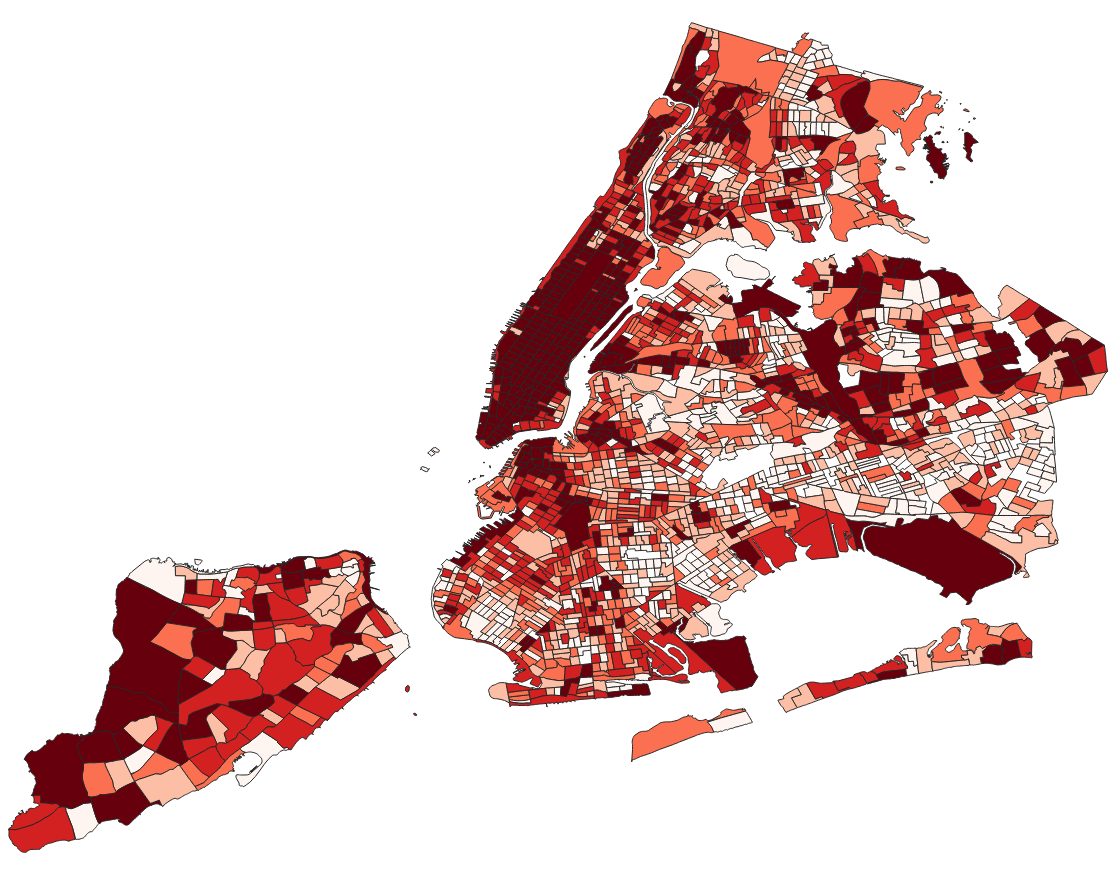

Figure 0. Origin Data

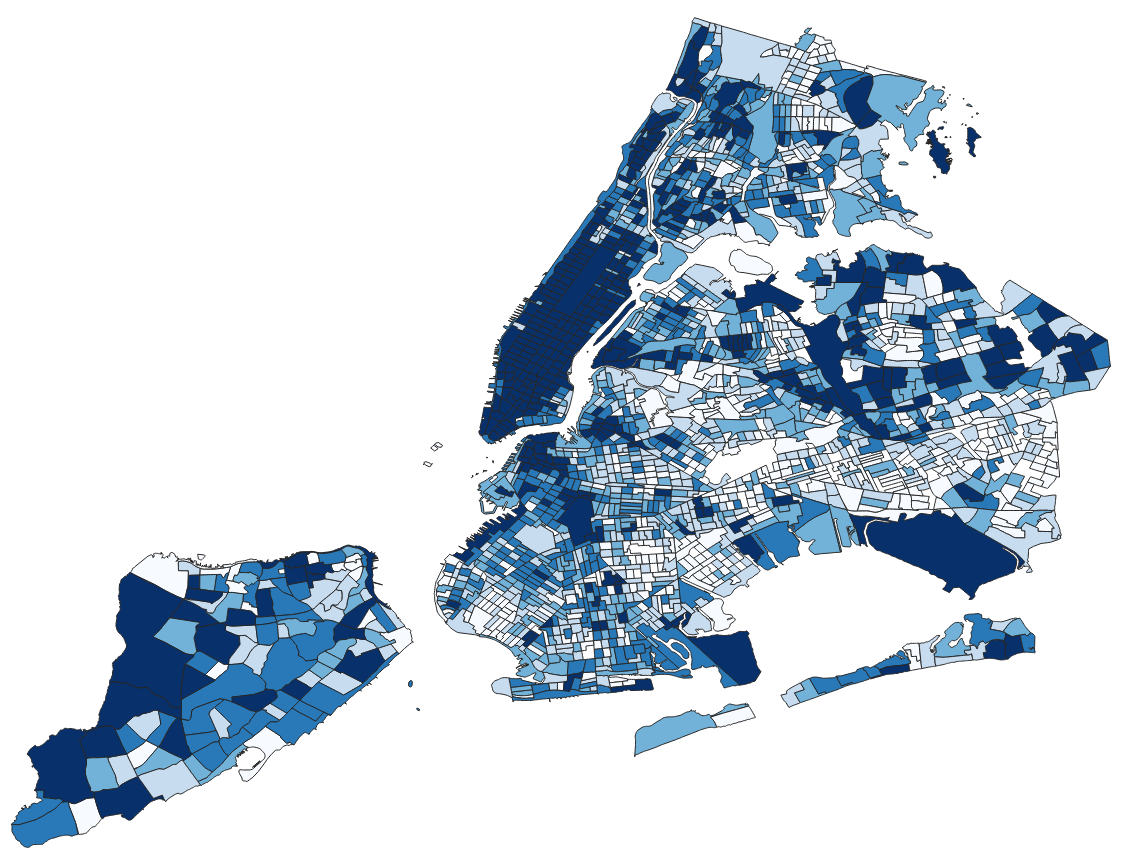

Figure 0. Destination data (Quantile)